In [1]:
# project: p2
# submitter: aluo7@wisc.edu
# partner: none
# hours: 6

In [2]:
import pandas as pd
import loans
import search
from time import time

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
applicant = loans.Applicant("<25", ["1", "2", "3"])
applicant.race

{'American Indian or Alaska Native', 'Asian', 'Black or African American'}

In [5]:
applicant

Applicant('<25', ['American Indian or Alaska Native', 'Asian', 'Black or African American'])

In [6]:
applicant.lower_age()

25

In [7]:
sorted([
    loans.Applicant(">75", ["43", "44"]),
    loans.Applicant("20-30", ["1", "3"]),
    loans.Applicant("35-44", ["22"]),
    loans.Applicant("<25", ["5"]),
])

[Applicant('20-30', ['American Indian or Alaska Native', 'Black or African American']),
 Applicant('25', ['White']),
 Applicant('35-44', ['Chinese']),
 Applicant('75', ['Other Pacific Islander', 'Samoan'])]

In [8]:
values = {'activity_year': '2020', 'lei': '549300FX7K8PTEQUU487', 'derived_msa-md': '31540', 'state_code': 'WI',
         'county_code': '55025', 'census_tract': '55025002402', 'conforming_loan_limit': 'C',
         'derived_loan_product_type': 'Conventional:First Lien',
         'derived_dwelling_category': 'Single Family (1-4 Units):Site-Built',
         'derived_ethnicity': 'Not Hispanic or Latino', 'derived_race': 'White', 'derived_sex': 'Male',
         'action_taken': '3', 'purchaser_type': '0', 'preapproval': '2', 'loan_type': '1', 'loan_purpose': '4',
         'lien_status': '1', 'reverse_mortgage': '2', 'open-end_line_of_credit': '1',
         'business_or_commercial_purpose': '2', 'loan_amount': '225000.0', 'loan_to_value_ratio': '78.671',
         'interest_rate': '3.000', 'rate_spread': 'NA', 'hoepa_status': '3', 'total_loan_costs': 'NA',
         'total_points_and_fees': 'NA', 'origination_charges': 'NA', 'discount_points': 'NA',
         'lender_credits': 'NA', 'loan_term': '360', 'prepayment_penalty_term': 'NA', 'intro_rate_period': '1',
         'negative_amortization': '2', 'interest_only_payment': '2', 'balloon_payment': '2',
         'other_nonamortizing_features': '2', 'property_value': '285000', 'construction_method': '1',
         'occupancy_type': '1', 'manufactured_home_secured_property_type': '3',
         'manufactured_home_land_property_interest': '5', 'total_units': '1', 'multifamily_affordable_units': 'NA',
         'income': '0', 'debt_to_income_ratio': '>60%', 'applicant_credit_score_type': '1',
         'co-applicant_credit_score_type': '10', 'applicant_ethnicity-1': '2', 'applicant_ethnicity-2': '',
         'applicant_ethnicity-3': '', 'applicant_ethnicity-4': '', 'applicant_ethnicity-5': '',
         'co-applicant_ethnicity-1': '5', 'co-applicant_ethnicity-2': '', 'co-applicant_ethnicity-3': '',
         'co-applicant_ethnicity-4': '', 'co-applicant_ethnicity-5': '', 'applicant_ethnicity_observed': '2',
         'co-applicant_ethnicity_observed': '4', 'applicant_race-1': '5', 'applicant_race-2': '',
         'applicant_race-3': '', 'applicant_race-4': '', 'applicant_race-5': '', 'co-applicant_race-1': '8',
         'co-applicant_race-2': '', 'co-applicant_race-3': '', 'co-applicant_race-4': '', 'co-applicant_race-5': '',
         'applicant_race_observed': '2', 'co-applicant_race_observed': '4', 'applicant_sex': '1',
         'co-applicant_sex': '5', 'applicant_sex_observed': '2', 'co-applicant_sex_observed': '4',
         'applicant_age': '55-64', 'co-applicant_age': '9999', 'applicant_age_above_62': 'Yes',
         'co-applicant_age_above_62': 'NA', 'submission_of_application': '1', 'initially_payable_to_institution': '1',
         'aus-1': '6', 'aus-2': '', 'aus-3': '', 'aus-4': '', 'aus-5': '', 'denial_reason-1': '1',
         'denial_reason-2': '', 'denial_reason-3': '', 'denial_reason-4': '', 'tract_population': '3572',
         'tract_minority_population_percent': '41.1499999999999986', 'ffiec_msa_md_median_family_income': '96600',
         'tract_to_msa_income_percentage': '64', 'tract_owner_occupied_units': '812',
         'tract_one_to_four_family_homes': '910', 'tract_median_age_of_housing_units': '45'}

In [9]:
loan = loans.Loan(values)
loan

<Loan: 3.0% on $285000.0 with 1 applicant(s)>

In [10]:
for amt in loan.yearly_amounts(20000):
    print(amt)

225000.0
211750.0
198102.5
184045.575
169566.94225000002
154653.95051750002
139293.56903302504
123472.3761040158
107176.54738713628
90391.84380875036
73103.59912301287
55296.70709670326
36955.60830960436
18064.27655889249


In [11]:
fhb = loans.Bank("First Home Bank")

In [12]:
#Q1
tot = 0
size = 0
for x in fhb.loans:
    if x.interest_rate != -1:
        tot += x.interest_rate
        size += 1
    else:
        pass
tot / size

2.962962962962963

In [13]:
#Q2
tot = 0
for x in fhb.loans:
    tot += len(x.applicants)
tot / len(fhb.loans)

1.5777777777777777

In [14]:
#Q3
dist = {}
for x in fhb.loans:
    for y in x.applicants:
        if y.age in dist:
            dist[y.age] += 1
        else:
            dist[y.age] = 1
dist

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [15]:
fhb_tree = search.BST()
for x in fhb.loans:
    fhb_tree.add(x.interest_rate, x)

In [16]:
#Q4
len(fhb_tree[-1])

18

In [17]:
#Q5
fhb_tree.root.height()

9

In [18]:
uwcu = loans.Bank("University of Wisconsin Credit Union")

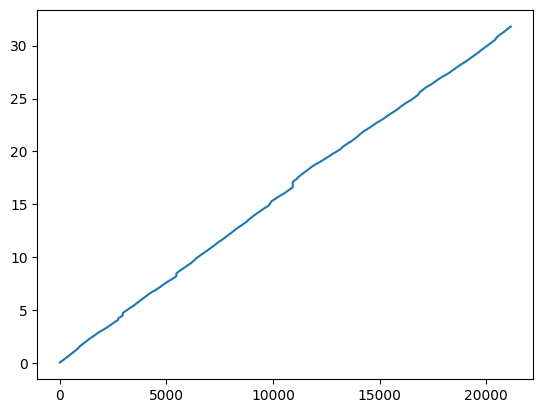

In [19]:
#Q6
uwcu_tree = search.BST()
times = {}

t0 =time()
for i, loan in enumerate(uwcu):
    uwcu_tree.add(loan.interest_rate, loan)
    times[i+1] = time() - t0
    
ax = (pd.Series(times)*1000).plot.line()

<AxesSubplot:>

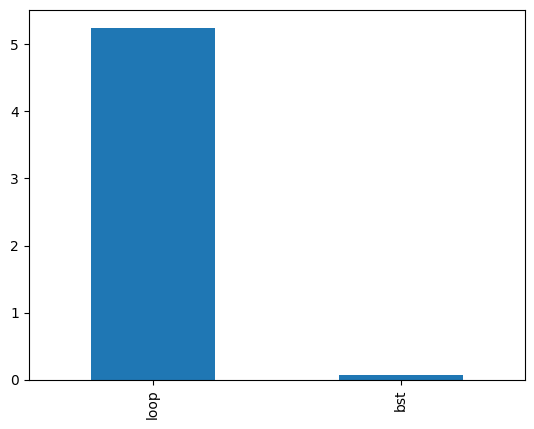

In [20]:
#Q7
d_search_len = {}

count = 0
t0 = time()
for x in uwcu.loans:
    if x.interest_rate == -1:
        count += 1
t1 = time()
d_search_len["loop"] = (t1-t0) * 1e3

t0 = time()
len(uwcu_tree[-1])
t1 = time()
d_search_len["bst"] = (t1-t0) * 1e3

pd.Series(d_search_len).plot.bar()

<AxesSubplot:>

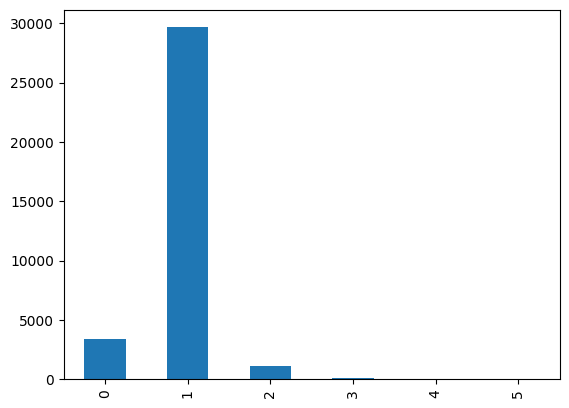

In [21]:
#Q8
race_selections = {}
for x in uwcu.loans:
    for y in x.applicants:
        if len(y.race) in race_selections:
            race_selections[len(y.race)] += 1
        else:
            race_selections[len(y.race)] = 1

pd.Series(race_selections).sort_index().plot.bar()

In [22]:
#Q9
uwcu_tree.root.leaf()

9

In [23]:
#Q10
uwcu_tree.root.second_highest()

6.99